# Homework 4 by Jeb Besecker #
#### 4/8/2025

# Importas and Loading
***Requirement**: Load the Predict Term Deposit Dataset.*


In [41]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import graphviz
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [42]:
# Load and explore dataset
df = pd.read_csv("../../Homework/Data/Predict Term Deposit.csv")
df.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribe_to_term_deposit
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [43]:
df.describe()

,Id,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45202.000000,45208.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,23606.000000,40.954714,1362.346620,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,11.539144,3044.852387,8.322476,257.527812,3.098021,100.128746,2.303441
min,1001.000000,-1.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,12303.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,23606.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,34908.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,46211.000000,999.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         45211 non-null  int64  
 1   age                        45202 non-null  float64
 2   job                        45211 non-null  object 
 3   marital                    45211 non-null  object 
 4   education                  45211 non-null  object 
 5   default                    45211 non-null  object 
 6   balance                    45208 non-null  float64
 7   housing                    45211 non-null  object 
 8   loan                       45211 non-null  object 
 9   contact                    45211 non-null  object 
 10  day                        45211 non-null  int64  
 11  month                      45211 non-null  object 
 12  duration                   45211 non-null  int64  
 13  campaign                   45211 non-null  int

<Axes: >

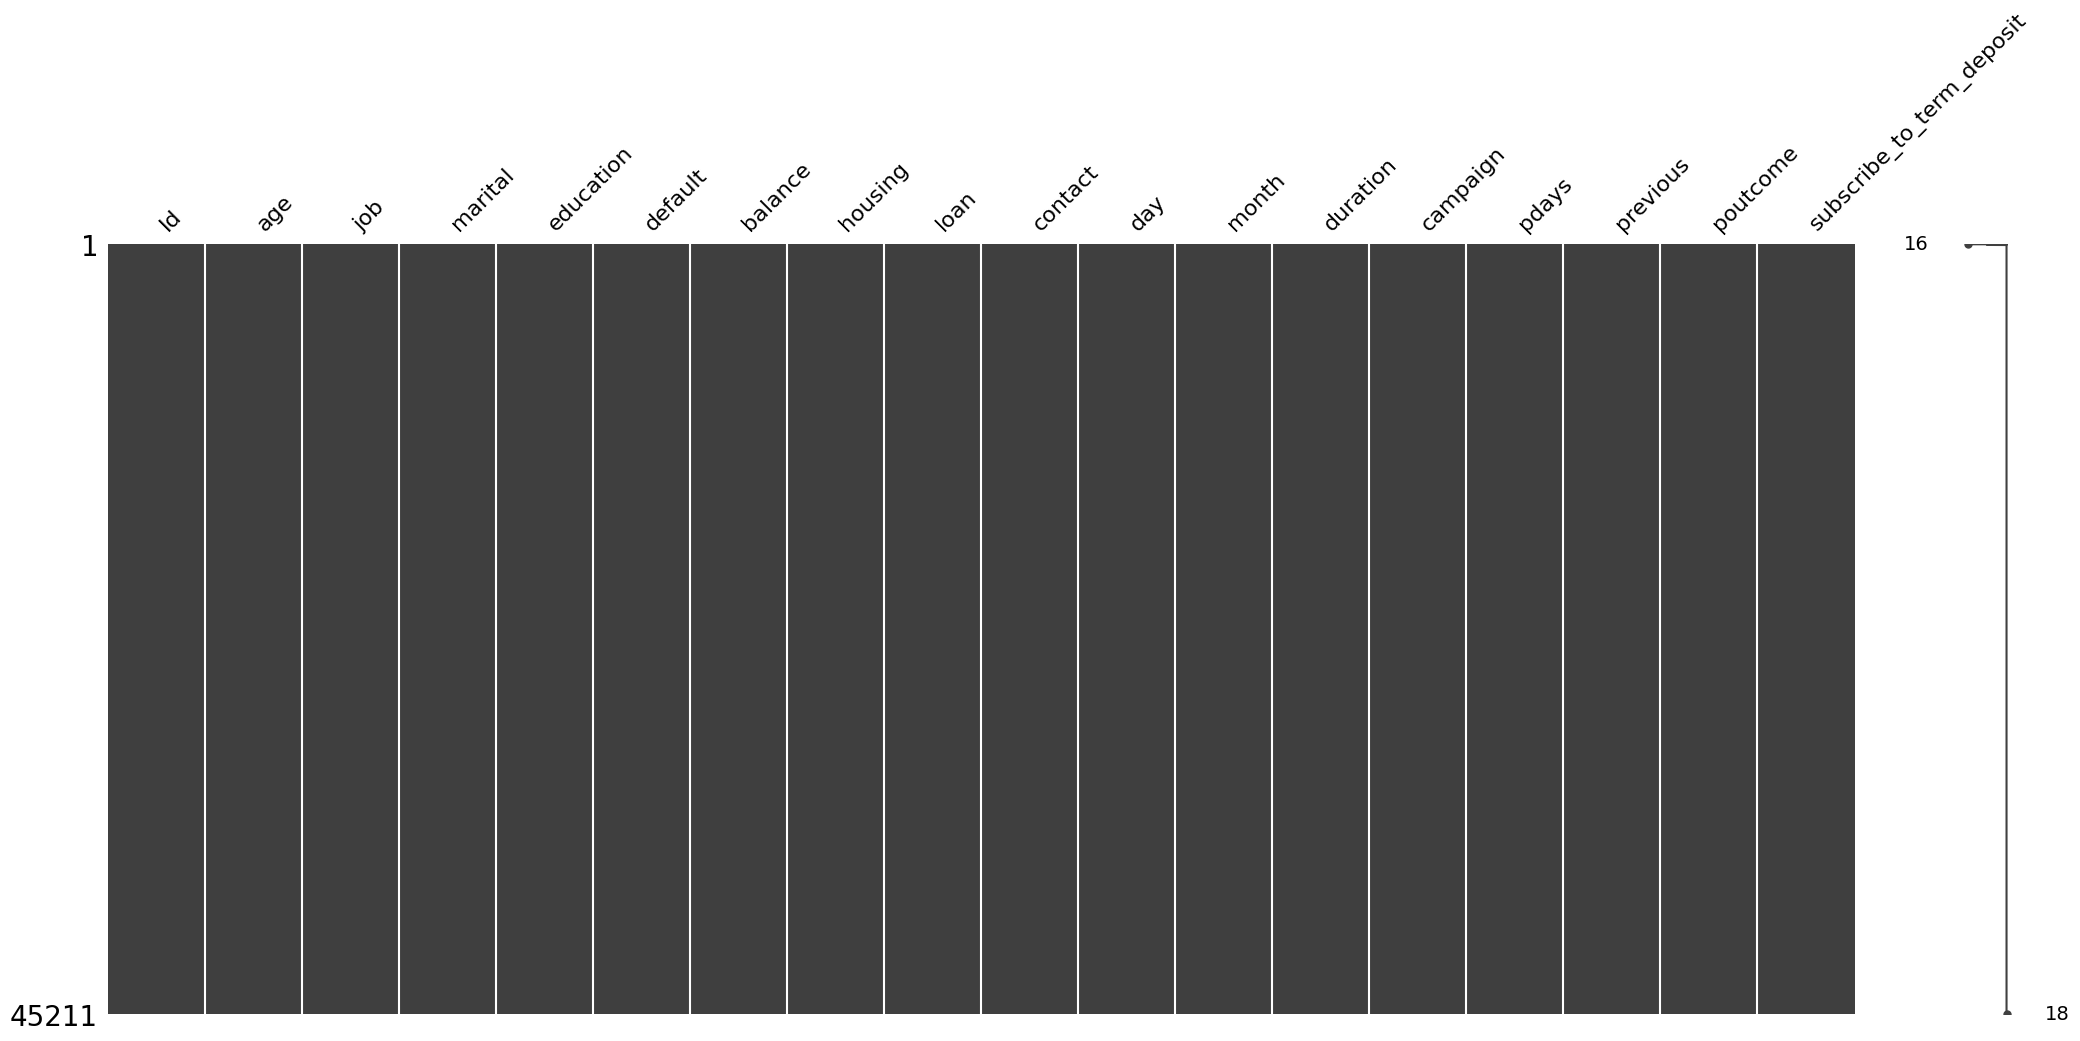

In [45]:
# Explore MissingNo
mno.matrix(df)

# Data Exploration and Categorical Analysis
***Requirement**: Univariate analysis of relevant features*


In [46]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_columns)

Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribe_to_term_deposit']


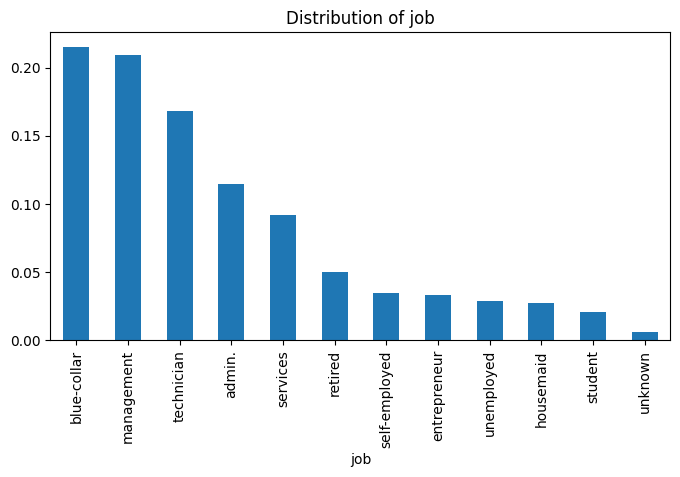

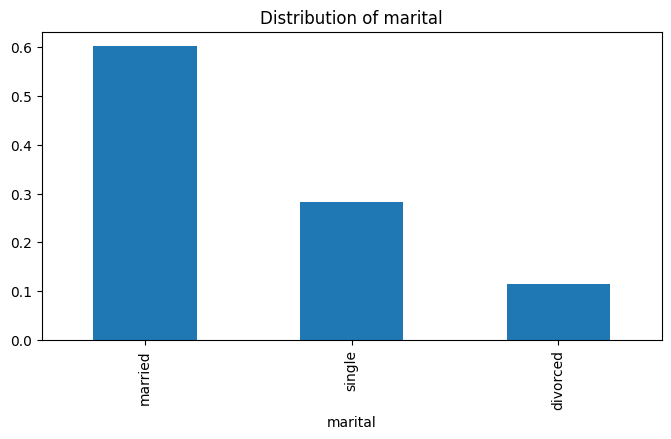

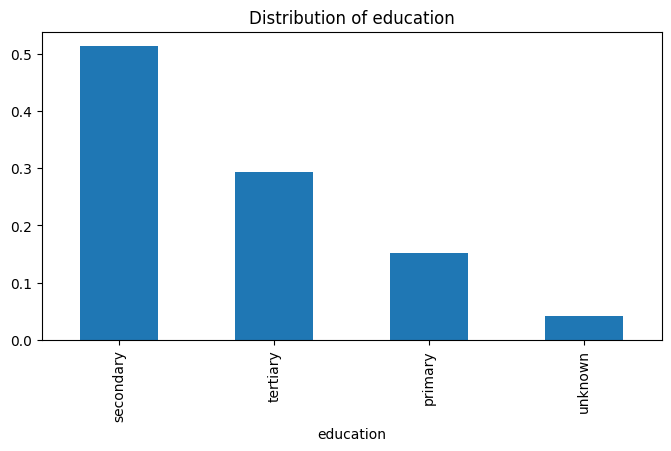

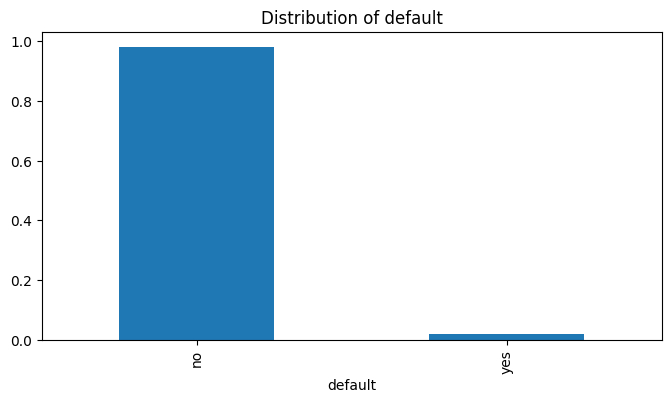

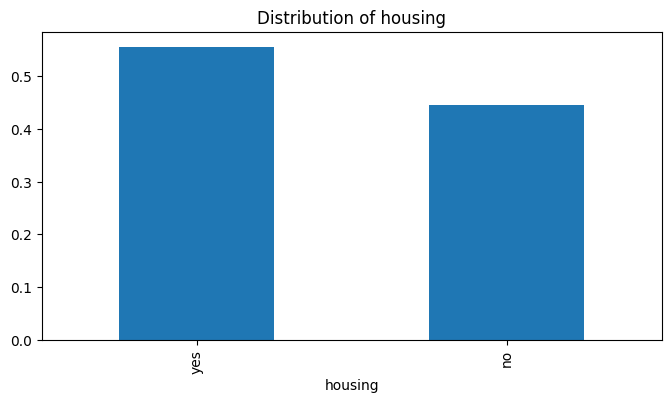

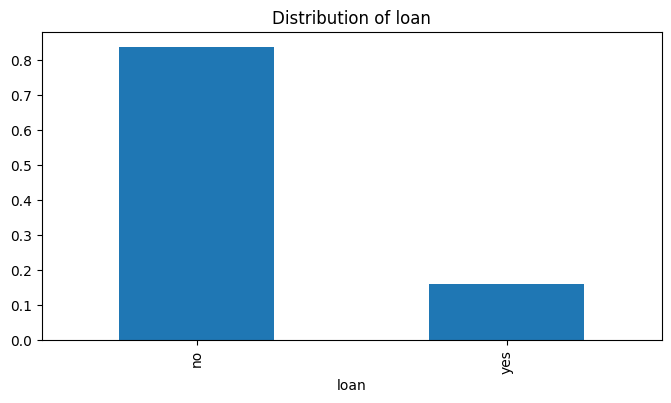

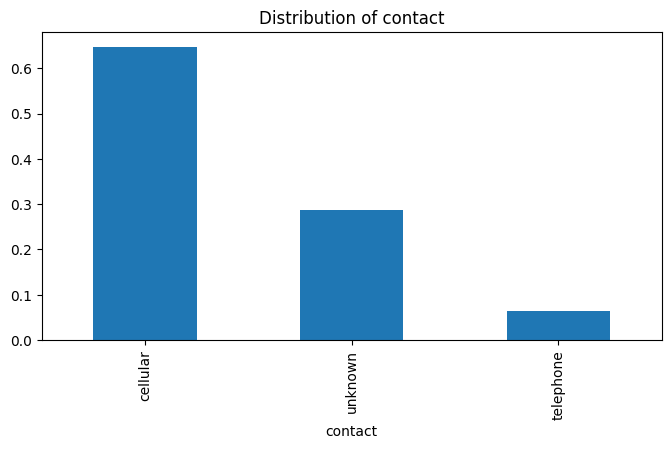

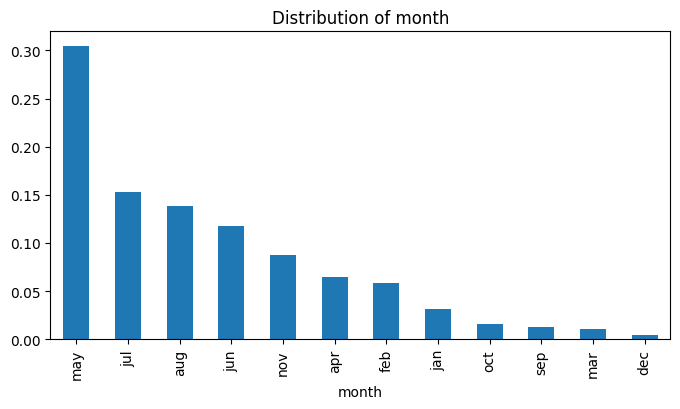

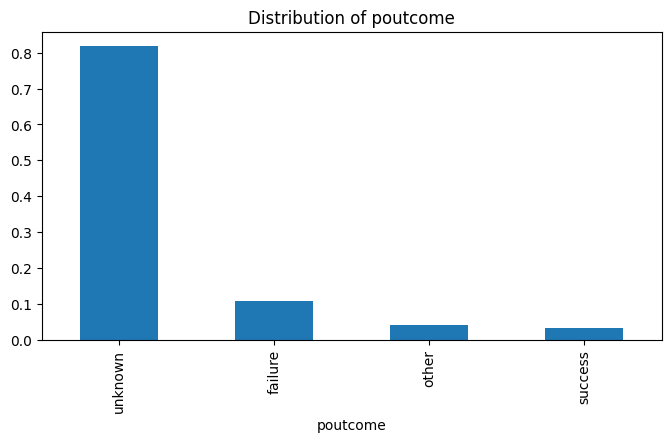

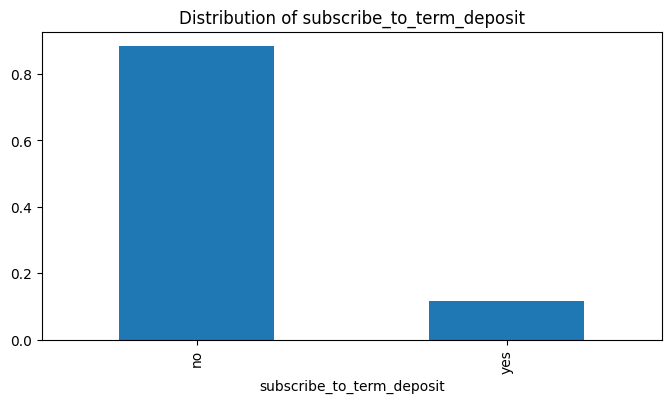

In [47]:
for col in categorical_columns:
    fig = plt.figure(figsize=(8, 4))
    df[col].value_counts(normalize=True).plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.show()

# Data Cleaning & Preprocessing

In [48]:
# Changelog to store changes
changelog = []

In [49]:
print(df.columns.tolist())


['Id', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'subscribe_to_term_deposit']


In [50]:
# Copy original df to df_cleaned
df_cleaned = df.copy()

# Define mapping: yes = 1, no = 0
binary_map = {'yes': 1, 'no': 0}

# Convert columns to binary
binary_columns = ['default', 'housing', 'loan', 'subscribe_to_term_deposit']
df_cleaned[binary_columns] = df_cleaned[binary_columns].apply(lambda col: col.map(binary_map))

# Add to changelog
changelog.append({
    'column': binary_columns,
    'change': 'Converted to binary (yes → 1, no → 0)',
    'rationale': 'Binary encoding improves model compatibility for categorical yes/no fields.',
})

In [51]:
# Remove ID column from df_cleaned
df_cleaned.drop(columns=['Id'], inplace=True)
changelog.append({
    'column': 'Id',
    'change': 'Removed ID column from df_cleaned',
    'rationale': 'ID column is not useful for prediction and can introduce noise.',
})


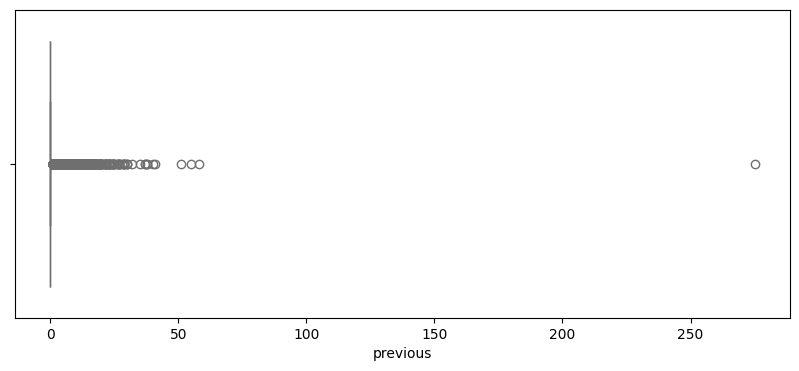

In [52]:
#Box plot of previous
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['previous'], color='skyblue')
plt.show()

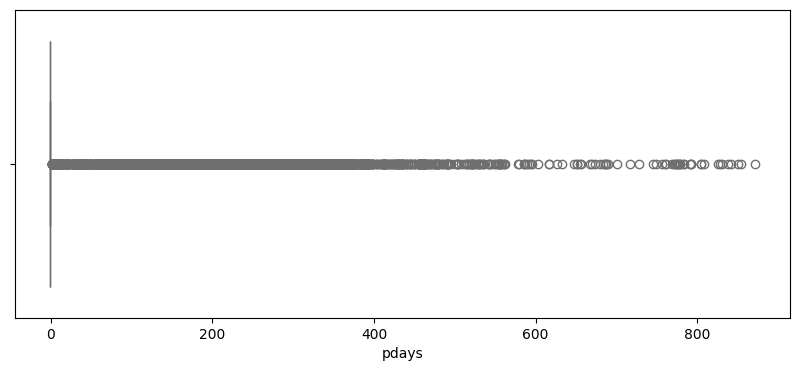

In [53]:
# Box plot of pdays
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['pdays'], color='skyblue')
plt.show()

In [54]:
# Remove 'previous' column
if 'previous' in df_cleaned.columns:
    df_cleaned.drop(columns=['previous'], inplace=True)
    changelog.append({
        'column': 'previous',
        'change': 'Removed column from df_cleaned',
        'rationale': 'Too little sample size and added too much noise to the dataset.',
    })

# Remove 'pdays' column
if 'pdays' in df_cleaned.columns:
    df_cleaned.drop(columns=['pdays'], inplace=True)
    changelog.append({
        'column': 'pdays',
        'change': 'Removed column from df_cleaned',
        'rationale': 'Too little sample size and added too much noise to the dataset.',
    })


In [55]:
# Check Numerical Variables 
numericalColumns = df_cleaned.select_dtypes(include=['float64', 'int64'])
numericalColumns.describe()


,age,default,balance,housing,loan,day,duration,campaign,subscribe_to_term_deposit
count,45202.000000,45211.000000,45208.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.954714,0.018027,1362.346620,0.555838,0.160226,15.806419,258.163080,2.763841,0.116985
std,11.539144,0.133049,3044.852387,0.496878,0.366820,8.322476,257.527812,3.098021,0.321406
min,-1.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,8.000000,103.000000,1.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,16.000000,180.000000,2.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,319.000000,3.000000,0.000000
max,999.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,4918.000000,63.000000,1.000000


In [56]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        45202 non-null  float64
 1   job                        45211 non-null  object 
 2   marital                    45211 non-null  object 
 3   education                  45211 non-null  object 
 4   default                    45211 non-null  int64  
 5   balance                    45208 non-null  float64
 6   housing                    45211 non-null  int64  
 7   loan                       45211 non-null  int64  
 8   contact                    45211 non-null  object 
 9   day                        45211 non-null  int64  
 10  month                      45211 non-null  object 
 11  duration                   45211 non-null  int64  
 12  campaign                   45211 non-null  int64  
 13  poutcome                   45211 non-null  obj

In [57]:
# Remove unrealistic ages
original_row_count = df_cleaned.shape[0]
df_cleaned = df_cleaned[df_cleaned['age'] <= 125]
removed_count = original_row_count - df.shape[0]

changelog.append({
    'column': 'age',
    'change': f'Removed {removed_count} row(s) where age > 125',
    'rationale': 'Oldest verified human lived to be 122; values above 125 are likely errors or outliers.',
})


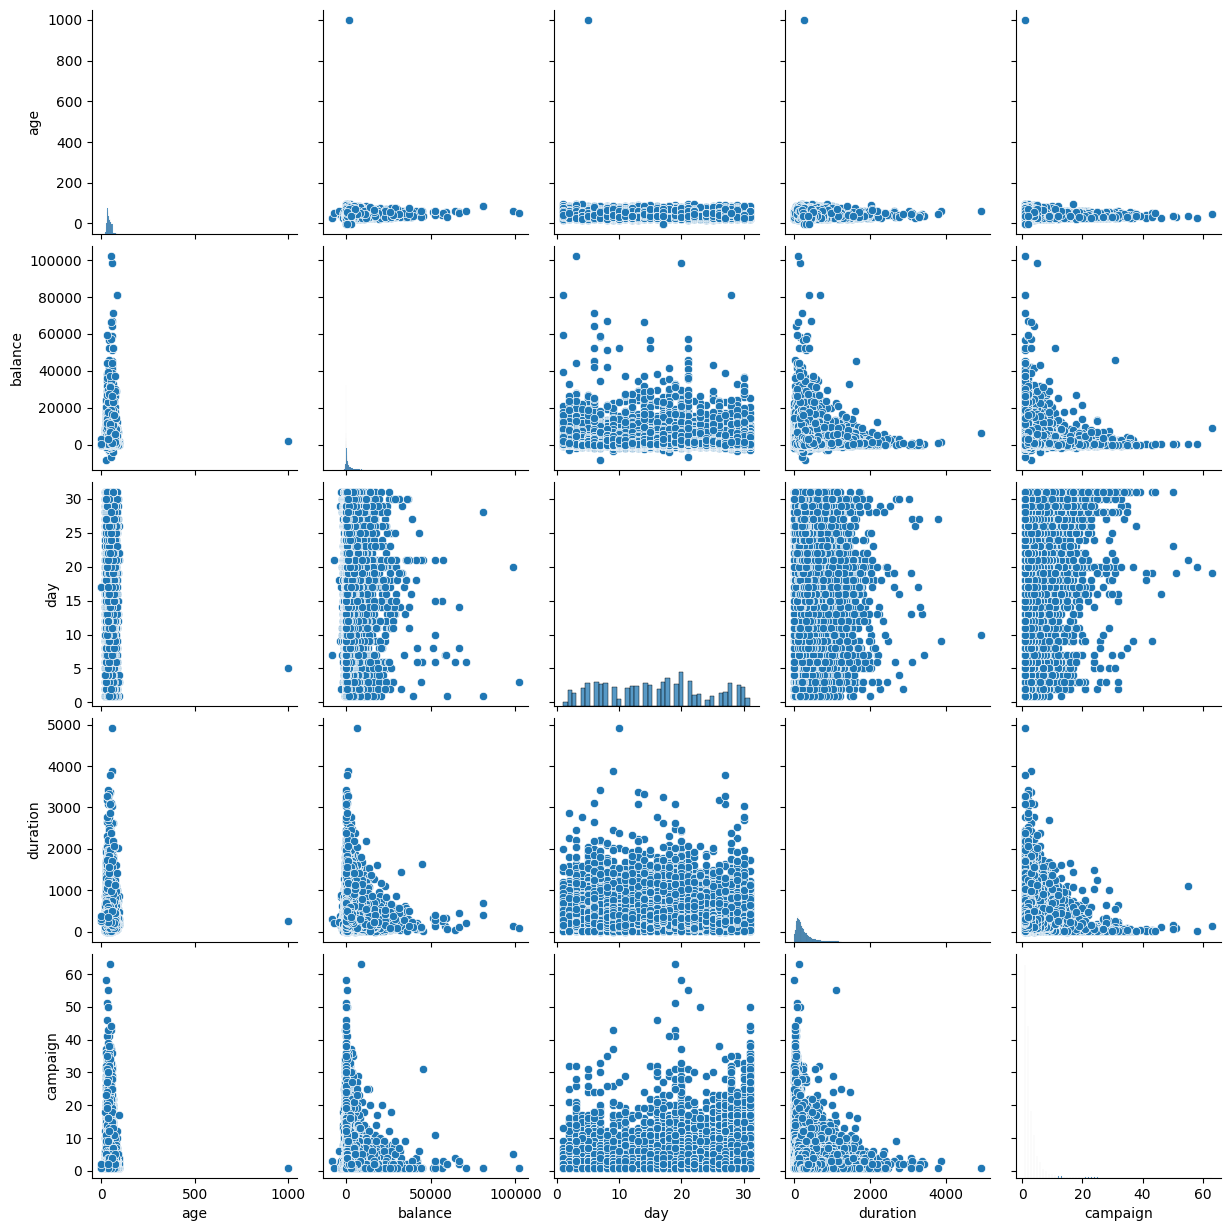

In [58]:
sns.pairplot(df[numericalColumns.columns])

balance: 4729 outlier(s)


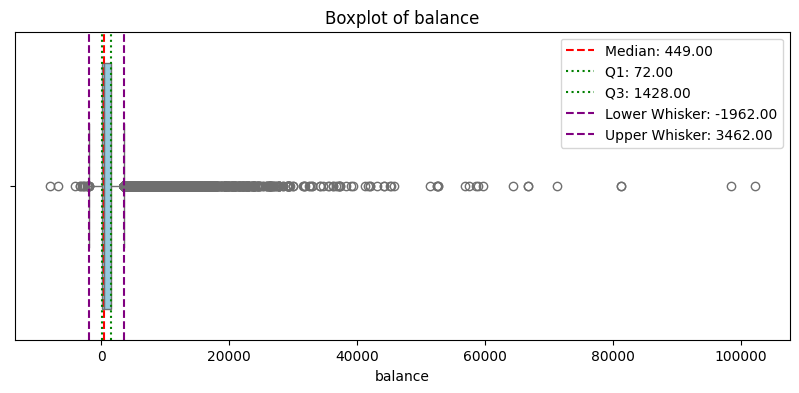

day: 0 outlier(s)


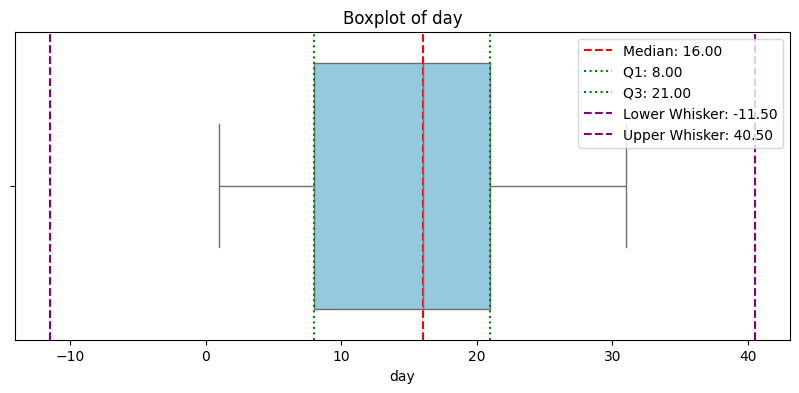

duration: 2908 outlier(s)


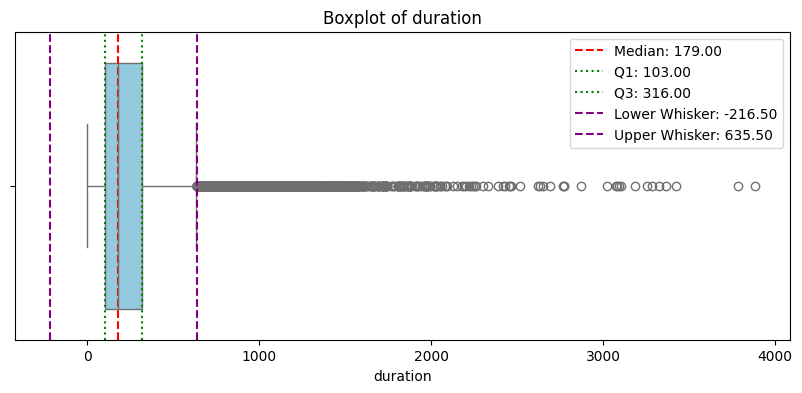

campaign: 2605 outlier(s)


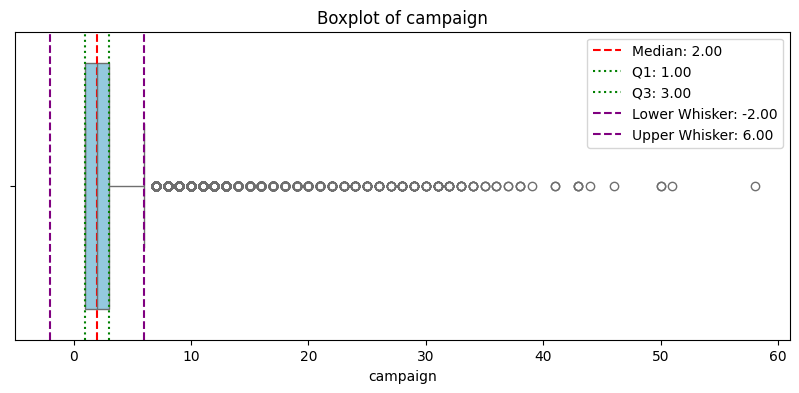

In [59]:
# Define binary columns to skip
binary_columns = ['default', 'housing', 'loan', 'subscribe_to_term_deposit']

for col in numericalColumns.columns:
    if col == 'age' or col in binary_columns:
        continue  # skip age and binary variables

    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df_cleaned[col], color='skyblue')

    # Calculate key stats
    q1 = df_cleaned[col].quantile(0.25)
    q3 = df_cleaned[col].quantile(0.75)
    median = df_cleaned[col].median()
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr

    # Identify outliers
    outliers = df_cleaned[(df_cleaned[col] < lower_whisker) | (df_cleaned[col] > upper_whisker)]
    outlier_count = outliers.shape[0]

    # Annotate boxplot
    plt.axvline(median, color='red', linestyle='--', label=f'Median: {median:.2f}')
    plt.axvline(q1, color='green', linestyle=':', label=f'Q1: {q1:.2f}')
    plt.axvline(q3, color='green', linestyle=':', label=f'Q3: {q3:.2f}')
    plt.axvline(lower_whisker, color='purple', linestyle='--', label=f'Lower Whisker: {lower_whisker:.2f}')
    plt.axvline(upper_whisker, color='purple', linestyle='--', label=f'Upper Whisker: {upper_whisker:.2f}')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.legend(loc='upper right')
    plt.grid(False)
    print(f"{col}: {outlier_count} outlier(s)")
    plt.show()

    # Remove outliers from df_cleaned
    if outlier_count > 0:
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_whisker) & (df_cleaned[col] <= upper_whisker)]

        changelog.append({
            'column': col,
            'change': f'Removed {outlier_count} row(s) from df_cleaned as outliers beyond boxplot whiskers',
            'rationale': f'Outliers identified using boxplot IQR rule: < {lower_whisker:.2f} or > {upper_whisker:.2f}',
        })


In [60]:
change_summary = pd.DataFrame(changelog)
pd.set_option('display.max_colwidth', None)
display(change_summary)

,column,change,rationale
0,"[default, housing, loan, subscribe_to_term_deposit]","Converted to binary (yes → 1, no → 0)",Binary encoding improves model compatibility for categorical yes/no fields.
1,Id,Removed ID column from df_cleaned,ID column is not useful for prediction and can introduce noise.
2,previous,Removed column from df_cleaned,Too little sample size and added too much noise to the dataset.
3,pdays,Removed column from df_cleaned,Too little sample size and added too much noise to the dataset.
4,age,Removed 0 row(s) where age > 125,Oldest verified human lived to be 122; values above 125 are likely errors or outliers.
5,balance,Removed 4729 row(s) from df_cleaned as outliers beyond boxplot whiskers,Outliers identified using boxplot IQR rule: < -1962.00 or > 3462.00
6,duration,Removed 2908 row(s) from df_cleaned as outliers beyond boxplot whiskers,Outliers identified using boxplot IQR rule: < -216.50 or > 635.50
7,campaign,Removed 2605 row(s) from df_cleaned as outliers beyond boxplot whiskers,Outliers identified using boxplot IQR rule: < -2.00 or > 6.00


In [61]:
df_cleaned.describe()

,age,default,balance,housing,loan,day,duration,campaign,subscribe_to_term_deposit
count,34957.000000,34957.000000,34957.000000,34957.000000,34957.000000,34957.000000,34957.000000,34957.000000,34957.000000
mean,40.615041,0.019309,638.813142,0.566267,0.169294,15.469863,206.446949,2.130503,0.086020
std,10.508388,0.137612,842.478844,0.495596,0.375016,8.311866,138.072646,1.319017,0.280398
min,-1.000000,0.000000,-1944.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,32.000000,0.000000,47.000000,0.000000,0.000000,8.000000,103.000000,1.000000,0.000000
50%,39.000000,0.000000,348.000000,1.000000,0.000000,15.000000,171.000000,2.000000,0.000000
75%,48.000000,0.000000,976.000000,1.000000,0.000000,21.000000,280.000000,3.000000,0.000000
max,95.000000,1.000000,3462.000000,1.000000,1.000000,31.000000,635.000000,6.000000,1.000000


# Feature Engineering

In [62]:
# Job grouping map
job_group_map = {
    'management': 'white_collar',
    'admin.': 'white_collar',
    'technician': 'white_collar',
    'blue-collar': 'blue_collar',
    'services': 'blue_collar',
    'retired': 'non_working',
    'unemployed': 'non_working',
    'housemaid': 'non_working',
    'student': 'student',  
    'self-employed': 'self_employed',
    'entrepreneur': 'self_employed',
    'unknown': 'unknown'
}

# Apply the updated mapping
df_cleaned['job_grouped'] = df_cleaned['job'].map(job_group_map)

# Drop original job column
df_cleaned.drop(columns=['job'], inplace=True)

# Add changelog entry
changelog.append({
    'column': 'job',
    'change': 'Grouped into job_grouped with 5 categories',
    'rationale': 'Reduced job granularity to 5 categories for better model performance.',
})


In [63]:
# Map months to quarters
month_to_quarter = {
    'jan': 'Q1', 'feb': 'Q1', 'mar': 'Q1',
    'apr': 'Q2', 'may': 'Q2', 'jun': 'Q2',
    'jul': 'Q3', 'aug': 'Q3', 'sep': 'Q3',
    'oct': 'Q4', 'nov': 'Q4', 'dec': 'Q4'
}

# Apply mapping
df_cleaned['month_grouped'] = df_cleaned['month'].map(month_to_quarter)

# Drop original month column
df_cleaned.drop(columns=['month'], inplace=True)

# Add changelog entry
changelog.append({
    'column': 'month',
    'change': 'Grouped into month_grouped by quarter (Q1–Q4)',
    'rationale': 'Simplified seasonality and reduced skew; quarters often reflect campaign timing.',
})


In [64]:
cleaned_categorical_columns = df_cleaned.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_columns)

Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribe_to_term_deposit']


In [65]:
# Remove rows with 'unknown' in any cleaned_categorical_columns
original_row_count = df_cleaned.shape[0]
df_cleaned = df_cleaned[~df_cleaned[cleaned_categorical_columns].isin(['unknown']).any(axis=1)]
removed_count = original_row_count - df_cleaned.shape[0]

# Add to changelog
changelog.append({
    'column': cleaned_categorical_columns,
    'change': f'Removed {removed_count} row(s) containing "unknown" values',
    'rationale': '"unknown" adds noise and uncertainty in modeling categorical variables',
})


In [66]:
# Apply one-hot encoding to existing categorical_columns
df_cleaned = pd.get_dummies(df_cleaned, columns=cleaned_categorical_columns, drop_first=True, dtype=int)

# Review structure (optional)
df_cleaned.info()

# Add to changelog
changelog.append({
    'column': categorical_columns,
    'change': 'Applied one-hot encoding (drop_first=True)',
    'rationale': 'Converted categorical variables into binary indicators for model compatibility.',
})


<class 'pandas.core.frame.DataFrame'>
Index: 6292 entries, 24060 to 45210
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        6292 non-null   float64
 1   default                    6292 non-null   int64  
 2   balance                    6292 non-null   float64
 3   housing                    6292 non-null   int64  
 4   loan                       6292 non-null   int64  
 5   day                        6292 non-null   int64  
 6   duration                   6292 non-null   int64  
 7   campaign                   6292 non-null   int64  
 8   subscribe_to_term_deposit  6292 non-null   int64  
 9   marital_married            6292 non-null   int32  
 10  marital_single             6292 non-null   int32  
 11  education_secondary        6292 non-null   int32  
 12  education_tertiary         6292 non-null   int32  
 13  contact_telephone          6292 non-null   int32

In [67]:
minmax_scaler = MinMaxScaler()
df_cleaned[numericalColumns.columns] = minmax_scaler.fit_transform(df_cleaned[numericalColumns.columns])
df_cleaned.head()

,age,default,balance,housing,loan,day,duration,campaign,subscribe_to_term_deposit,marital_married,...,contact_telephone,poutcome_other,poutcome_success,job_grouped_non_working,job_grouped_self_employed,job_grouped_student,job_grouped_white_collar,month_grouped_Q2,month_grouped_Q3,month_grouped_Q4
24060,0.377778,0.0,0.517396,0.0,0.0,0.666667,0.052464,0.0,0.0,1,...,1,0,0,0,0,0,1,0,0,1
24062,0.477778,0.0,0.306210,1.0,1.0,0.666667,0.815580,0.0,1.0,0,...,1,1,0,0,0,0,1,0,0,1
24064,0.377778,0.0,0.996633,1.0,0.0,0.666667,0.219396,0.0,1.0,1,...,1,0,0,0,0,0,0,0,0,1
24072,0.411111,0.0,0.804153,1.0,0.0,0.700000,0.106518,0.0,0.0,1,...,1,1,0,0,0,0,1,0,0,1
24077,0.411111,0.0,0.352413,1.0,0.0,0.733333,0.213037,0.0,1.0,1,...,1,0,0,0,0,0,1,0,0,1


In [68]:
# Drop all rows with any missing values
original_row_count = df_cleaned.shape[0]
df_cleaned.dropna(inplace=True)
df_cleaned.reset_index(drop=True, inplace=True)
removed_count = original_row_count - df_cleaned.shape[0]

# Changelog entry
changelog.append({
    'column': 'all',
    'change': f'Dropped {removed_count} row(s) with missing values and reset index',
    'rationale': 'Ensured data integrity by removing incomplete rows; index reset for cleanliness.',
})


# Models

In [69]:
# Split the data into features and target variable
X = df_cleaned.drop(columns=['subscribe_to_term_deposit'])
y = df_cleaned['subscribe_to_term_deposit']


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)

In [71]:
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")

X_train: (4404, 22)
X_test: (1888, 22)


In [72]:
y_train.value_counts(normalize=True)

subscribe_to_term_deposit
0.0    0.799955
1.0    0.200045
Name: proportion, dtype: float64

In [73]:
# Build a Logistic Regression model
lrBase = LogisticRegression(max_iter=1000)
lrBase.fit(X_train, y_train)
y_pred = lrBase.predict(X_test)

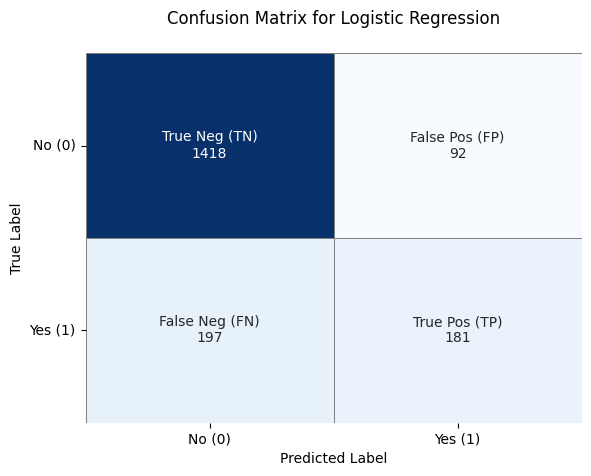

In [74]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define labels for annotations
group_names = ['True Neg (TN)', 'False Pos (FP)', 'False Neg (FN)', 'True Pos (TP)']
group_counts = [f'{value}' for value in cm.flatten()]
labels = [f'{name}\n{count}' for name, count in zip(group_names, group_counts)]
labels = np.array(labels).reshape(2, 2)

# Plot
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False, linewidths=0.5, linecolor='gray')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression\n')
plt.xticks(ticks=[0.5, 1.5], labels=['No (0)', 'Yes (1)'])
plt.yticks(ticks=[0.5, 1.5], labels=['No (0)', 'Yes (1)'], rotation=0)
plt.show()

In [75]:
# Applying SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 3: Combine into new balanced DataFrame
df_balanced = pd.concat(
    [pd.DataFrame(X_resampled, columns=X.columns),
     pd.Series(y_resampled, name='subscribe_to_term_deposit')],
    axis=1
)

# Step 4: Add changelog entry
changelog.append({
    'column': 'subscribe_to_term_deposit',
    'change': f'Resampled with SMOTE to balance target classes (shape now: {df_balanced.shape})',
    'rationale': 'Used SMOTE to correct class imbalance for better model performance.',
})

In [76]:
# Step 1: Split balanced data into X and y
X_smote = df_balanced.drop(columns=['subscribe_to_term_deposit'])
y_smote = df_balanced['subscribe_to_term_deposit']

# Step 2: Split into training and testing sets
X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(
    X_smote, y_smote, test_size=0.2, random_state=42
)

lr_smote = LogisticRegression(max_iter=1000)
lr_smote.fit(X_smote_train, y_smote_train)

y_smote_pred = lr_smote.predict(X_smote_test)

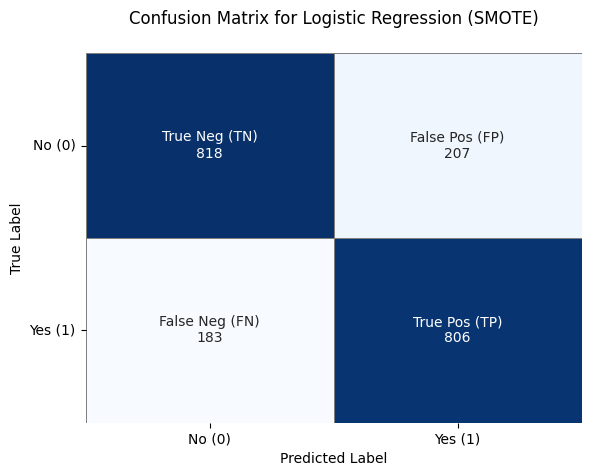

In [77]:
# Compute confusion matrix
cm = confusion_matrix(y_smote_test, y_smote_pred)

# Define labels for annotations
group_names = ['True Neg (TN)', 'False Pos (FP)', 'False Neg (FN)', 'True Pos (TP)']
group_counts = [f'{value}' for value in cm.flatten()]
labels = [f'{name}\n{count}' for name, count in zip(group_names, group_counts)]
labels = np.array(labels).reshape(2, 2)

# Plot
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False, linewidths=0.5, linecolor='gray')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression (SMOTE)\n')
plt.xticks(ticks=[0.5, 1.5], labels=['No (0)', 'Yes (1)'])
plt.yticks(ticks=[0.5, 1.5], labels=['No (0)', 'Yes (1)'], rotation=0)
plt.show()

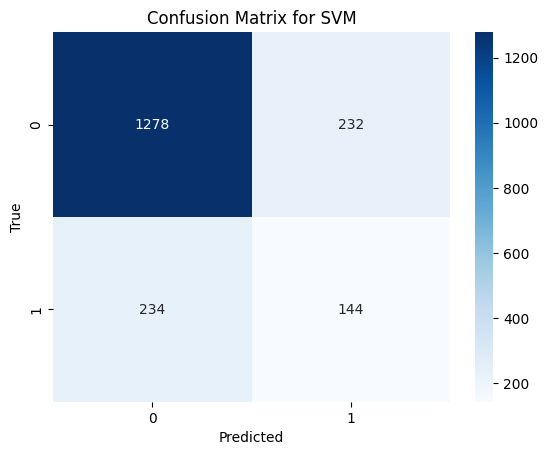

In [78]:
# SVM Model
svmBase = SVC(kernel='sigmoid', C=10, random_state=42)
svmBase.fit(X_train, y_train)
y_pred_svm = svmBase.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix for SVM')
plt.show()

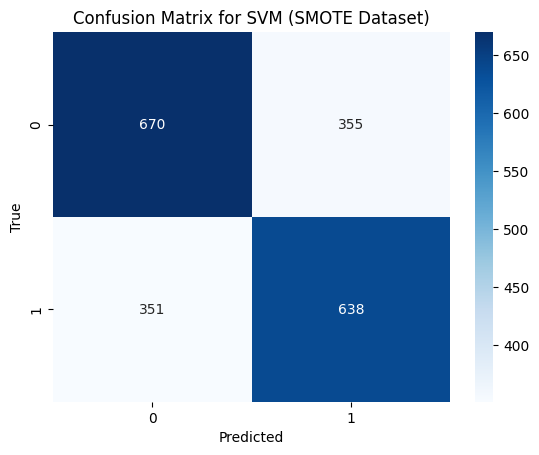

In [79]:
# Train SVM on SMOTE data
svm_smote = SVC(kernel='sigmoid', C=10, random_state=42)
svm_smote.fit(X_smote_train, y_smote_train)

# Predict
y_smote_pred_svm = svm_smote.predict(X_smote_test)

# Confusion matrix
cm_svm = confusion_matrix(y_smote_test, y_smote_pred_svm)

# Plot
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVM (SMOTE Dataset)')
plt.show()

In [80]:
#Changelog summary
change_summary = pd.DataFrame(changelog)
pd.set_option('display.max_colwidth', None)
display(change_summary)

,column,change,rationale
0,"[default, housing, loan, subscribe_to_term_deposit]","Converted to binary (yes → 1, no → 0)",Binary encoding improves model compatibility for categorical yes/no fields.
1,Id,Removed ID column from df_cleaned,ID column is not useful for prediction and can introduce noise.
2,previous,Removed column from df_cleaned,Too little sample size and added too much noise to the dataset.
3,pdays,Removed column from df_cleaned,Too little sample size and added too much noise to the dataset.
4,age,Removed 0 row(s) where age > 125,Oldest verified human lived to be 122; values above 125 are likely errors or outliers.
5,balance,Removed 4729 row(s) from df_cleaned as outliers beyond boxplot whiskers,Outliers identified using boxplot IQR rule: < -1962.00 or > 3462.00
6,duration,Removed 2908 row(s) from df_cleaned as outliers beyond boxplot whiskers,Outliers identified using boxplot IQR rule: < -216.50 or > 635.50
7,campaign,Removed 2605 row(s) from df_cleaned as outliers beyond boxplot whiskers,Outliers identified using boxplot IQR rule: < -2.00 or > 6.00
8,job,Grouped into job_grouped with 5 categories,Reduced job granularity to 5 categories for better model performance.
9,month,Grouped into month_grouped by quarter (Q1–Q4),Simplified seasonality and reduced skew; quarters often reflect campaign timing.
